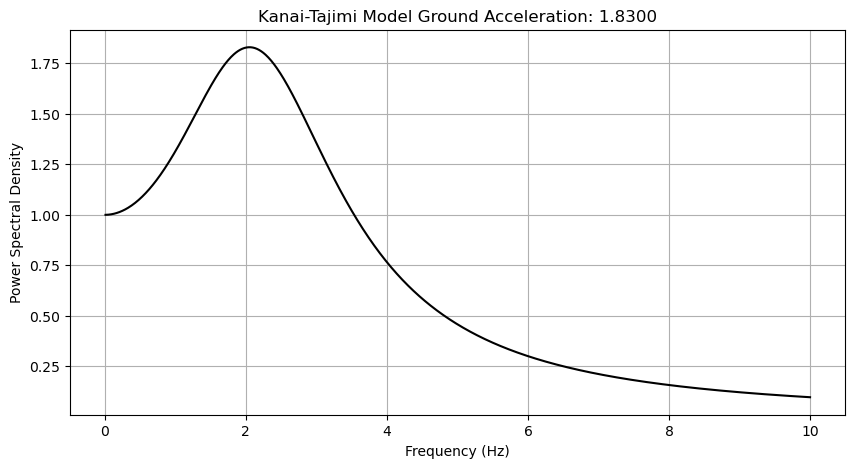

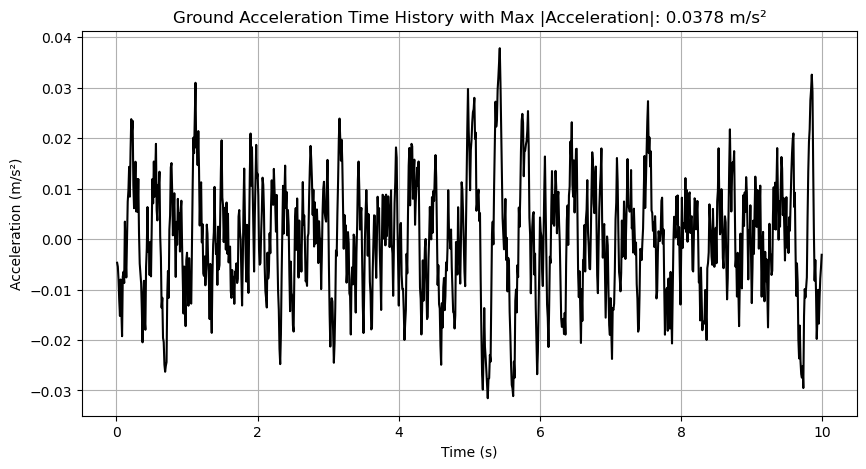

Maximum absolute ground acceleration: 0.0378 m/s²
Ground acceleration data has been printed to ground_acceleration.txt


In [14]:
"""
   #######################################################################
   #                            IN THE NAME OF ALLAH                     #
   # Using the Kanai-Tajimi model involves simulating a non-stationary   #
   # stochastic process to represent earthquake ground motion            #
   # Nonlinear Dynamic Analysis on Concrete Confined Section Column      #
   # With Uncertainty Conditions Using Probability Distribution Function #
   # Monte-Carlo Method                                                  #
   #---------------------------------------------------------------------#
   #            THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI            #
   #                 EMAIL: salar.d.ghashghaei@gmail.com                 #
   #######################################################################

Generate ground acceleration using the Kanai-Tajimi model involves simulating a non-stationary stochastic process:

Using the Kanai-Tajimi model involves simulating a non-stationary stochastic process to represent
earthquake ground motion. The Kanai-Tajimi model is a widely used approach to simulate the random ground acceleration
experienced during an earthquake. It is based on the concept of a filtered Gaussian process, where the ground acceleration
is modeled as a white noise process (acceleration at the bedrock) that is filtered through a viscoelastic system representing
the soil layer.

The classical Tajimi-Kanai model consists of a linear oscillator attached to the bedrock, which moves with an acceleration
modeled as a Gaussian white noise process. This model is often used for the analysis of structures subjected to earthquakes.
The parameters of the model, such as the damping ratio ( \zeta_g ) and the frequency ( \omega_g ) of the soil deposit,
are calibrated by observing zero crossings and other statistics of historical earthquakes1.

In more advanced versions, such as the fractional Tajimi-Kanai model, the purely viscous element in the Kelvin-Voigt element
(a spring in parallel with a dashpot) is replaced with a springpot, which exhibits behavior between purely elastic and purely
viscous. This modification allows for a more accurate representation of the viscoelastic behavior of the ground and ensures
that the number of zero crossings of the absolute acceleration at the free field remains finite1.

The non-stationary aspect of the process is typically accounted for by applying an envelope or shape function to the stationary
process, which adjusts the intensity of the ground motion over time, reflecting the way an actual earthquake’s intensity
changes2.
Overall, the Kanai-Tajimi model and its variations provide a mathematical framework to generate artificial earthquake records
that can be used for the design and analysis of structures to withstand seismic events.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Kanai-Tajimi model parameters
omega_g = 2 * np.pi * 2.5  # Natural frequency of the ground (rad/s)
zeta_g = 0.6               # Damping ratio of the ground
S_0 = 1                    # Intensity of the ground motion

# Define the frequency range for the simulation
freq = np.linspace(0.01, 10, 1000)
omega = 2 * np.pi * freq

# Kanai-Tajimi Power Spectral Density function
def kanai_tajimi_psd(omega, omega_g, zeta_g, S_0):
    return S_0 * (1 + (2 * zeta_g * omega / omega_g)**2) / ((1 - (omega / omega_g)**2)**2 + (2 * zeta_g * omega / omega_g)**2)

# Calculate the PSD
psd = kanai_tajimi_psd(omega, omega_g, zeta_g, S_0)
# Find the psd
max_psd = np.max(np.abs(psd))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(freq, psd, label='Kanai-Tajimi Model', color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title(f'Kanai-Tajimi Model Ground Acceleration: {max_psd:.4f}')
#plt.semilogy()
plt.grid(True)
plt.show()

############################################################################

def BETA_PDF(MIN_X, MAX_X, n):
    a = .5; b = .5;
    import numpy as np
    return MIN_X + (MAX_X - MIN_X) * np.random.beta(a, b, n)

# Time settings
t_max = 10                  # Total time for simulation (s)
dt = 0.01                  # Time step (s)
time = np.arange(0, t_max, dt)

# White noise generation
#np.random.seed(0)           # Seed for reproducibility
#white_noise = np.random.normal(0, np.sqrt(S_0), len(time))
white_noise = BETA_PDF(-np.sqrt(S_0), np.sqrt(S_0), len(time))

# Kanai-Tajimi model differential equations
def kanai_tajimi_model(Y, t, omega_g, zeta_g, white_noise):
    x, v = Y
    dxdt = v
    dvdt = -2 * zeta_g * omega_g * v - omega_g**2 * x + white_noise[int(t/dt)]
    return [dxdt, dvdt]

# Initial conditions
Y0 = [0, 0]

# Solve the differential equations
sol = odeint(kanai_tajimi_model, Y0, time, args=(omega_g, zeta_g, white_noise))

# Extract the ground acceleration time history
ground_acceleration = sol[:, 1]

# Find the maximum absolute ground acceleration
max_ground_acceleration = np.max(np.abs(ground_acceleration))

# Plot the ground acceleration time history
plt.figure(figsize=(10, 5))
plt.plot(time[1:], ground_acceleration[1:], label='Ground Acceleration', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title(f'Ground Acceleration Time History with Max |Acceleration|: {max_ground_acceleration:.4f} m/s²')
plt.grid(True)
plt.savefig('Ground_Acceleration_Chart.png')  # Save the figure as a .png file
plt.show()

# Print ground acceleration to a text file
with open(f'Ground_Acceleration.txt', 'w') as file:
    new_ground_acceleration = ground_acceleration[1:]
    for acc in new_ground_acceleration:
        file.write(f'{acc:.6f}\n')

print(f'Maximum absolute ground acceleration: {max_ground_acceleration:.4f} m/s²')
print('Ground acceleration data has been printed to ground_acceleration.txt')


In [15]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.6f}')
    print(f'First quartile: {q1:.6f}')
    #print(f'Mode: {MODE:.6f}')
    print(f'Median: {MEDIAN:.6f}')
    print(f'Mean: {MEAN:.6f}')
    print(f'Std: {STD:.6f}')
    print(f'Third quartile: {q3:.6f}')
    print(f'Maximum: {MAXIMUM :.6f}')
    print(f'Skewness: {skew(X) :.6f}')
    print(f'kurtosis: {kurtosis(X) :.6f}')
    print(f"90% Confidence Interval: ({lower_bound:.6f}, {upper_bound:.6f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 1000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.6f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.6f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.6f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.6f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.6f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.6f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.6f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.6f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.6f}")
    plt.text(q3, 1.05, f" Q3: {q3:.6f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.6f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.6f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.6f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.6f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.6f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.6f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.6f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()

-------------------------
Box-Chart Datas: 
Minimum: -0.031548
First quartile: -0.007946
Median: 0.000500
Mean: 0.000001
Std: 0.011793
Third quartile: 0.007976
Maximum: 0.037842
Skewness: 0.016879
kurtosis: -0.090824
90% Confidence Interval: (-0.019062, 0.019458)
-------------------------


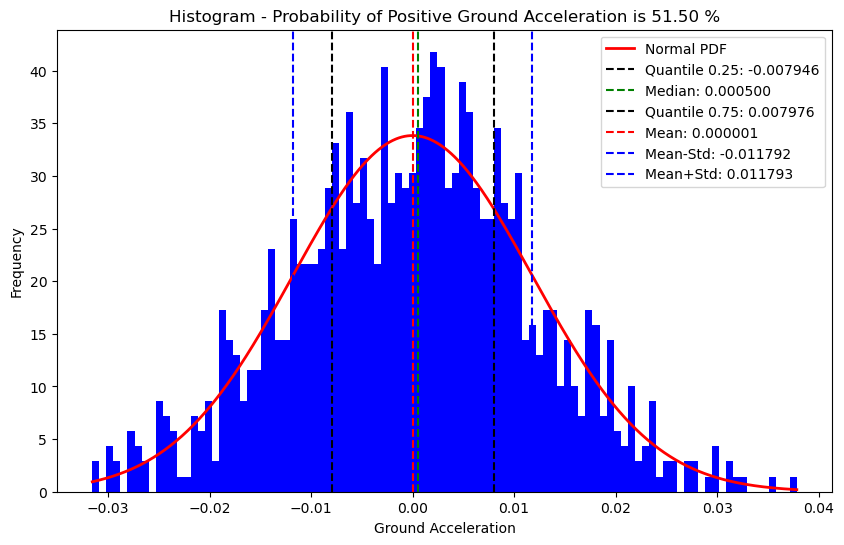

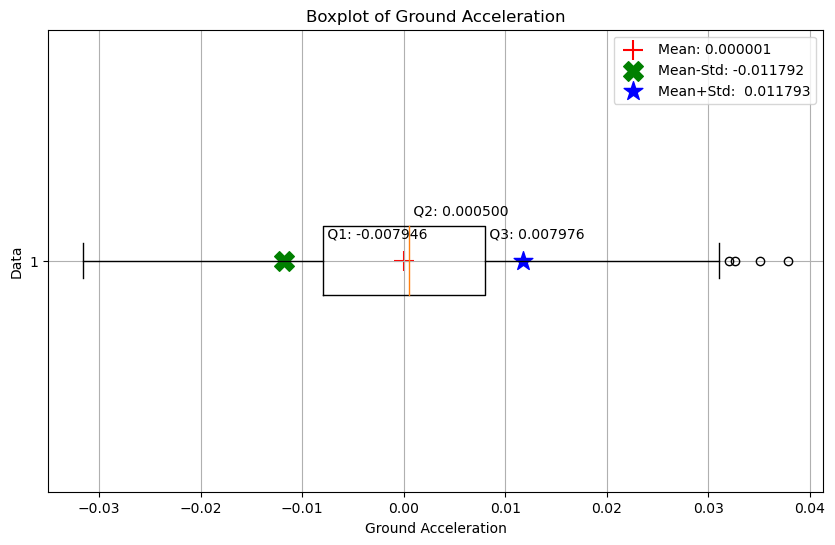

In [16]:
HISROGRAM_BOXPLOT(ground_acceleration, HISTO_COLOR='blue', LABEL='Ground Acceleration')